## Sumary

Perform a one-sample $z$-test of a population mean and a two-sample $z$-test of the difference between two population means.

Data on the mean pass rate across all UK test centres during the period from April 2014 to March 2015 was obtained and analysed using an approximate normal model.
(Data were taken from the Open University, who did not provide the primary source.)

Two two-sided $z$-tests were performed:

1. A one-sample $z$-test of the null hypothesis that the mean total pass rate for the UK practical driving test in 2014/15 was equal to the 2013/2014 mean total pass rate (which was given as 47.1%).[^1]
2. A two-sample $z$-test of the null hypothesis that the mean total pass rate of females for the UK practical driving test in 2014/15 was equal to that of males.[^2]

Normality of the three data were checked using normal probability plots.[^3]

General workflow:

1. Load the data
1. Describe the data
1. Plot the data
1. Get an interval estimate
1. Check the normality of the data
1. Perform the hypothesis test

These topics were covered in M248, Units 8 and 9.

## Dependencies

In [1]:
import pandas as pd
from scipy import stats as st
from statsmodels.stats import weightstats as ws
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

## Constants

In [3]:
URL = ('https://raw.githubusercontent.com/ljk233/laughingrook-datasets'
       + '/main/uk_prac_driving_tests/pass_rates.csv')

## Main

### Load data

In [4]:
pass_rates = pd.read_csv(URL)
pass_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   centre  316 non-null    object 
 1   female  316 non-null    float64
 2   male    316 non-null    float64
 3   total   316 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.0+ KB


### Test 1: Was the mean total pass rate in 2014/15 equal to that in 2013/14?

This is a test of the hypotheses,

$$
H_{0}: \mu_{2014} = \mu_{2013};
\hspace{3mm} H_{1}: \mu_{2014} \ne \mu_{2013},
$$

where $\mu_{2013}=$ 47.1%.

Describe the total pass rate.

In [5]:
pass_rates['total'].describe()

count    316.000000
mean      49.630380
std        7.165444
min       30.300000
25%       44.975000
50%       49.650000
75%       54.500000
max       71.300000
Name: total, dtype: float64

Inititialise an instance of `DescrStatsW`.

In [6]:
d = ws.DescrStatsW(pass_rates['total'])

Plot the distribution of total pass rates in 2014/15.

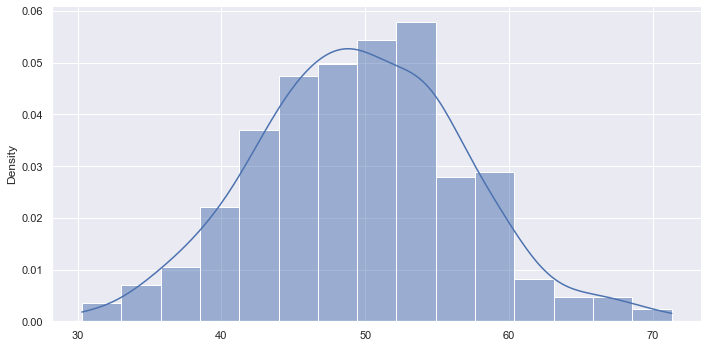

In [7]:
_g = sns.displot(
            x=d.data,
            kind='hist',
            kde=True,
            stat='density',
            aspect=2
)

Return an interval estimate of the mean total pass rate.

In [8]:
pd.Series(data=d.zconfint_mean(), index=['lcb', 'ucb']).round(6)

lcb    48.840342
ucb    50.420417
dtype: float64

Check the normality of the data.

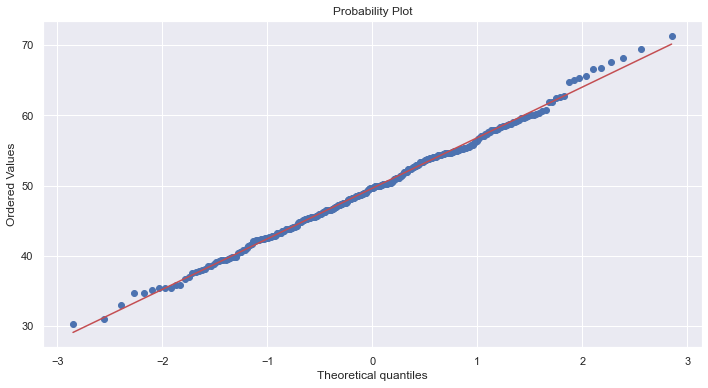

In [9]:
_f, _ax = plt.subplots(figsize=(11.8, 6))
_res = st.probplot(x=d.data, plot=_ax)

Perform a one-sample $z$-test.

In [10]:
pd.Series(data=d.ztest_mean(value=47.1), index=['zstat', 'pvalue']).round(6)

zstat     6.277492
pvalue    0.000000
dtype: float64

### Test 2: Was the mean pass rate of females equal to that of males?

This is a test of the hypotheses,

$$
H_{0}: \mu_{f} = \mu_{m};
\hspace{3mm} H_{1}: \mu_{f} \ne \mu_{m}.
$$

Describe the data.

In [11]:
pass_rates[['female', 'male']].describe().T

,count,mean,std,min,25%,50%,75%,max
female,316.0,46.325633,7.362729,26.2,41.500,46.20,51.025,69.6
male,316.0,53.415506,7.521000,33.3,48.175,53.05,58.125,78.3


Initialise instance of `CompareMeans`.

In [12]:
cm = ws.CompareMeans(
            d1=ws.DescrStatsW(pass_rates['female']),
            d2=ws.DescrStatsW(pass_rates['male'])
)

Return interval estimates of the mean female and male pass rates.

In [13]:
pd.DataFrame(
    data=[cm.d1.zconfint_mean(), cm.d2.zconfint_mean()],
    columns=['lcb', 'ucb'],
    index=['female', 'male']
)

,lcb,ucb
female,45.513843,47.137422
male,52.586267,54.244746


Plot the distributions of the pass rates.

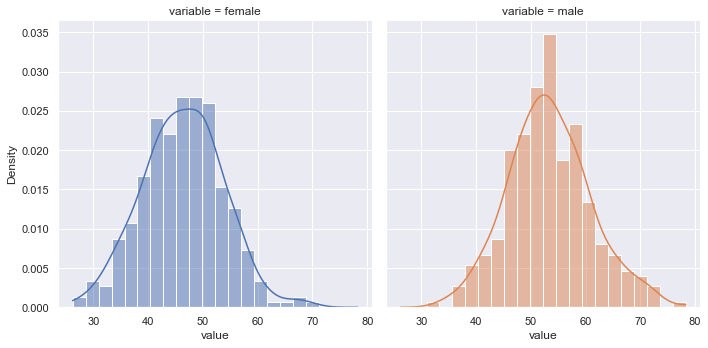

In [14]:
_g = sns.displot(
            data=pass_rates[['female', 'male']].melt(),
            x='value',
            kind='hist',
            col='variable',
            hue='variable',
            legend=False,
            kde=True,
            stat='density'
)

Check the normality of both data.

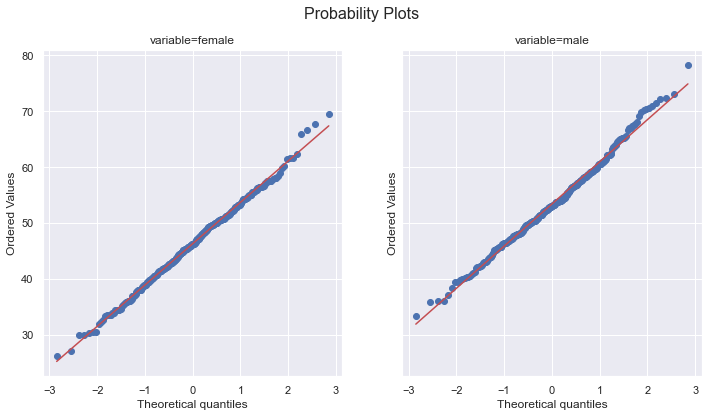

In [18]:
_f, _axs = plt.subplots(1, 2, figsize=(11.8, 6), sharey=True)
st.probplot(x=cm.d1.data, plot=_axs[0])
st.probplot(x=cm.d2.data, plot=_axs[1])
_f.suptitle('Probability Plots', fontsize=16)
_axs[0].set_title('variable=female')
_axs[1].set_title('variable=male')
plt.show()

Perform the two-sample $z$-test.

In [16]:
pd.Series(data=cm.ztest_ind(), index=['zstat', 'pvalue']).round(6)

zstat    -11.974591
pvalue     0.000000
dtype: float64

[^1]: [statsmodels.stats.weightstats.DescrStatsW](https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.DescrStatsW.html)
[^2]: [statsmodels.stats.weightstats.CompareMeans](https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.CompareMeans.html)
[^3]: [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)